In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from helper import (plot_exponential_data, 
                    plot_square_normal_data)

import warnings
warnings.simplefilter("ignore")

In [21]:
data = pd.read_csv('avocado-updated-2020.csv')
df = pd.DataFrame(data)
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [22]:
avg_price = df['average_price']
avg_price

0        1.22
1        1.79
2        1.00
3        1.76
4        1.08
         ... 
30016    1.58
30017    1.09
30018    1.71
30019    0.89
30020    1.58
Name: average_price, Length: 30021, dtype: float64

In [23]:
from scipy.stats.mstats import normaltest

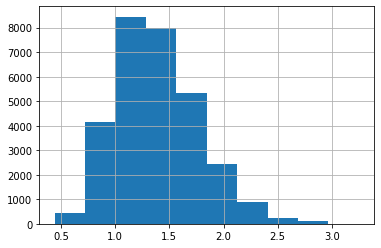

In [24]:
df.average_price.hist()

In [25]:
normaltest(df.average_price.values)

NormaltestResult(statistic=1731.0483969916725, pvalue=0.0)

In [26]:
from scipy.stats import boxcox

In [31]:
boxcox_results= boxcox(df.average_price)
boxcox_avgprice=boxcox_results[0]
boxcox_avgprice

array([ 0.20266645,  0.61574167,  0.        , ...,  0.56487645,
       -0.11524942,  0.47795322])

In [32]:
lam = bc[1]
lam

0.19056105101452928

In [33]:
boxcox_avgprice.shape

(30021,)

(array([  34.,  328., 1480., 4689., 7344., 7905., 5558., 2101.,  507.,
          75.]),
 array([-0.75998263, -0.55183298, -0.34368333, -0.13553369,  0.07261596,
         0.28076561,  0.48891525,  0.6970649 ,  0.90521455,  1.11336419,
         1.32151384]),
 <a list of 10 Patch objects>)

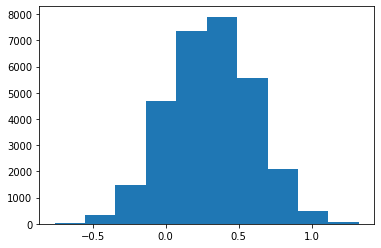

In [34]:
plt.hist(boxcox_avgprice)

In [35]:
normaltest(boxcox_avgprice)

NormaltestResult(statistic=44.9532736317713, pvalue=1.7318914137840244e-10)

In [ ]:
log_avgprice = np.log(df.avg)